1/1 [==============================] - 3s 3s/step


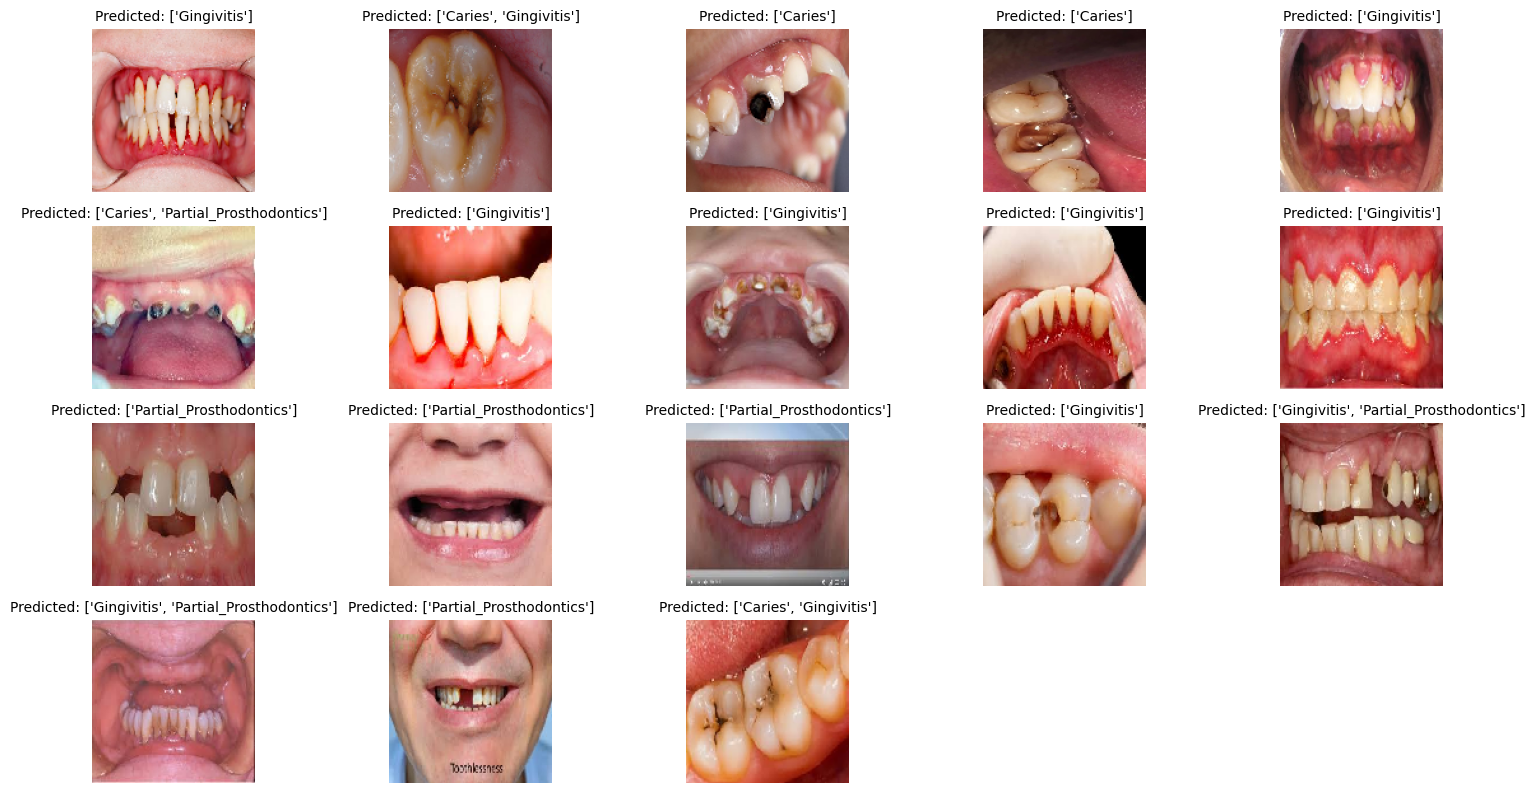

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os

model_path = 'multi_label_dental_disease_model_mobilenetv2.h5'
loaded_model = load_model(model_path)

img_size = 128
data_dir = 'Test'
threshold = 0.2

image_paths = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

images = []
for img_path in image_paths:
    img = load_img(img_path, target_size=(img_size, img_size))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    images.append(img_array)

images = np.vstack(images) 

predictions = loaded_model.predict(images, verbose=1)

class_labels = ['Caries', 'Gingivitis', 'Partial_Prosthodontics']

plt.figure(figsize=(15, 10))
for i in range(len(predictions)):
    prediction = predictions[i]
    predicted_classes = [class_labels[j] for j in range(len(class_labels)) if prediction[j] > threshold]
    
    img = load_img(image_paths[i], target_size=(img_size, img_size))
    
    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.title(f'Predicted: {predicted_classes}', fontsize=10)

plt.tight_layout()
plt.show()
